In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("data/Mastercard_stock_history.csv")
df.head()
df.iloc[-1,:]

Date            2021-10-11
Open            353.950012
High            354.880005
Low             346.899994
Close           347.149994
Volume             2766800
Dividends              0.0
Stock Splits           0.0
Name: 3871, dtype: object

Exploratory data analysis

In [33]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3872.000000,3872.000000,3872.000000,3872.000000,3.872000e+03,3872.000000,3872.000000
mean,104.896814,105.956054,103.769349,104.882714,1.232250e+07,0.002329,0.002583
std,106.245511,107.303589,105.050064,106.168693,1.759665e+07,0.025851,0.160706
min,3.748967,4.102467,3.739664,4.083861,6.411000e+05,0.000000,0.000000
25%,22.347203,22.637997,22.034458,22.300391,3.529475e+06,0.000000,0.000000
50%,70.810079,71.375896,70.224002,70.856083,5.891750e+06,0.000000,0.000000
75%,147.688448,148.645373,146.822013,147.688438,1.319775e+07,0.000000,0.000000
max,392.653890,400.521479,389.747812,394.685730,3.953430e+08,0.440000,10.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3872 non-null   object 
 1   Open          3872 non-null   float64
 2   High          3872 non-null   float64
 3   Low           3872 non-null   float64
 4   Close         3872 non-null   float64
 5   Volume        3872 non-null   int64  
 6   Dividends     3872 non-null   float64
 7   Stock Splits  3872 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 242.1+ KB


In [35]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [36]:
df.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [37]:
# convert Date into datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [38]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0
2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0
2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0
2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0
2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0


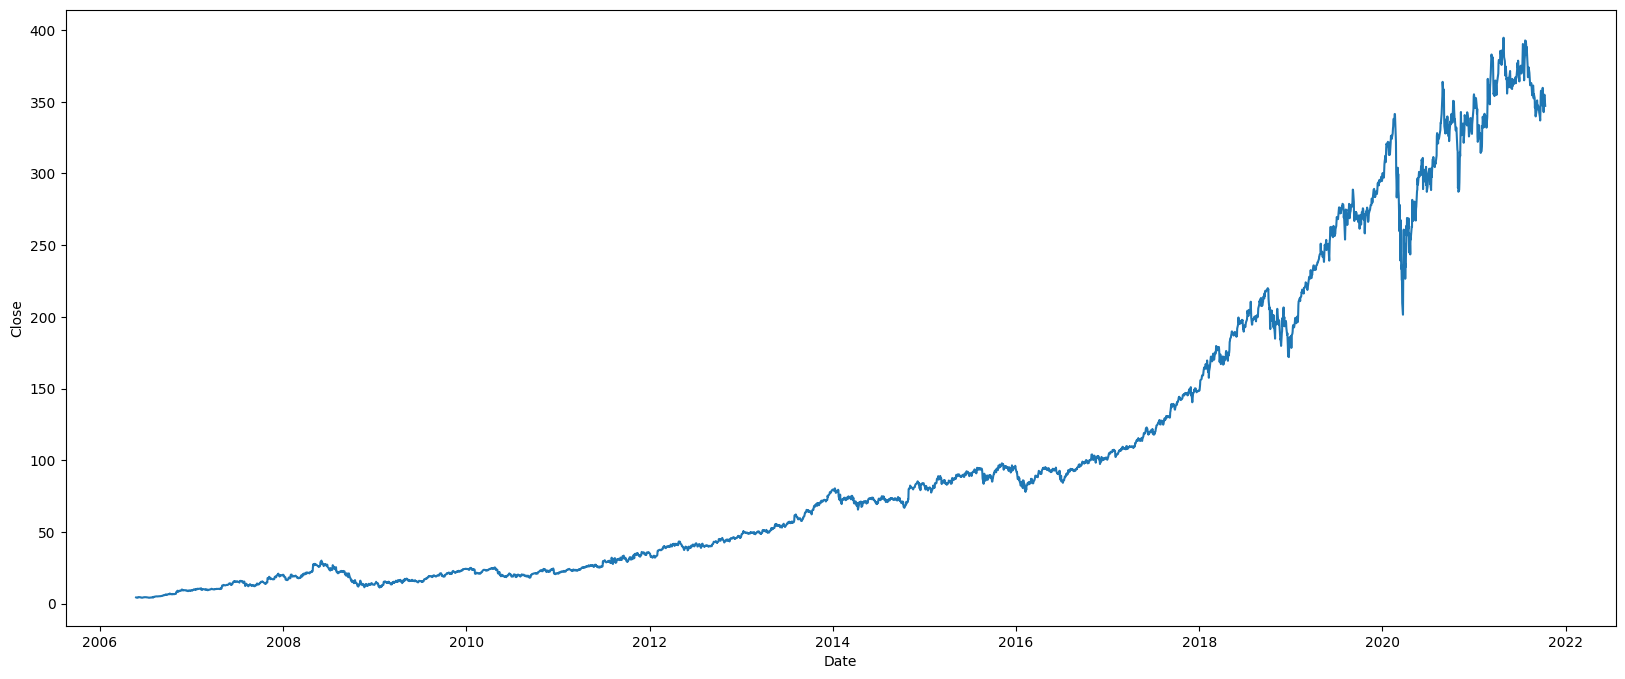

In [39]:
# plot of close price against time
plt.figure(figsize=(20,8))
g = sns.lineplot(x = 'Date', y = 'Close', data = df)
# g.set_xticks(np.round(np.linspace(0, len(df) - 1, num=15)))
# g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.show()

Moving Average plot

Scatter Plot: If you're interested in exploring relationships between stock prices and other variables (like volume, market index, etc.), scatter plots can be useful. They help in identifying correlations and trends.

Correlation Heatmap: This visualization displays the correlation coefficients between different stock prices or between stock prices and other variables. It helps in identifying which stocks move together or inversely.

Seasonal Decomposition Plot: This plot decomposes the time series into its trend, seasonal, and residual components. It helps in understanding the underlying patterns and seasonality within the data.

Autocorrelation Plot: Autocorrelation measures the correlation of the time series with a lagged version of itself. Plotting autocorrelation helps in identifying repeating patterns or cycles within the data.

Partial Autocorrelation Plot: Partial autocorrelation measures the correlation between two points in time while controlling for the effect of other data points between them. It helps in identifying the direct relationship between observations at different lags.

Heatmap of Returns: Creating a heatmap of returns helps in visualizing how stock returns vary across different days or time periods. It can reveal patterns such as clustering of high or low returns.

In [40]:
# create a moving average feature (rolling mean)
# rolling std dev plot (rolling std)
# histogram of stock prices to show distribution

In [41]:
df["MA"] = df['Close'].rolling(round(len(df) * 0.05)).mean()
df.head(30)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA
Date,,,,,,,,
2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0,NaN
2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0,NaN
2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0,NaN
2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0,NaN
2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0,NaN
2006-06-02,4.511782,4.530387,4.352707,4.371312,37253000,0.0,0.0,NaN
2006-06-05,4.376895,4.581554,4.372244,4.572251,37188000,0.0,0.0,NaN
2006-06-06,4.649463,4.709930,4.446665,4.493178,49045000,0.0,0.0,NaN
2006-06-07,4.495968,4.502480,4.348986,4.428059,25013000,0.0,0.0,NaN


## Rolling Average and Rolling Standard Deviation plots

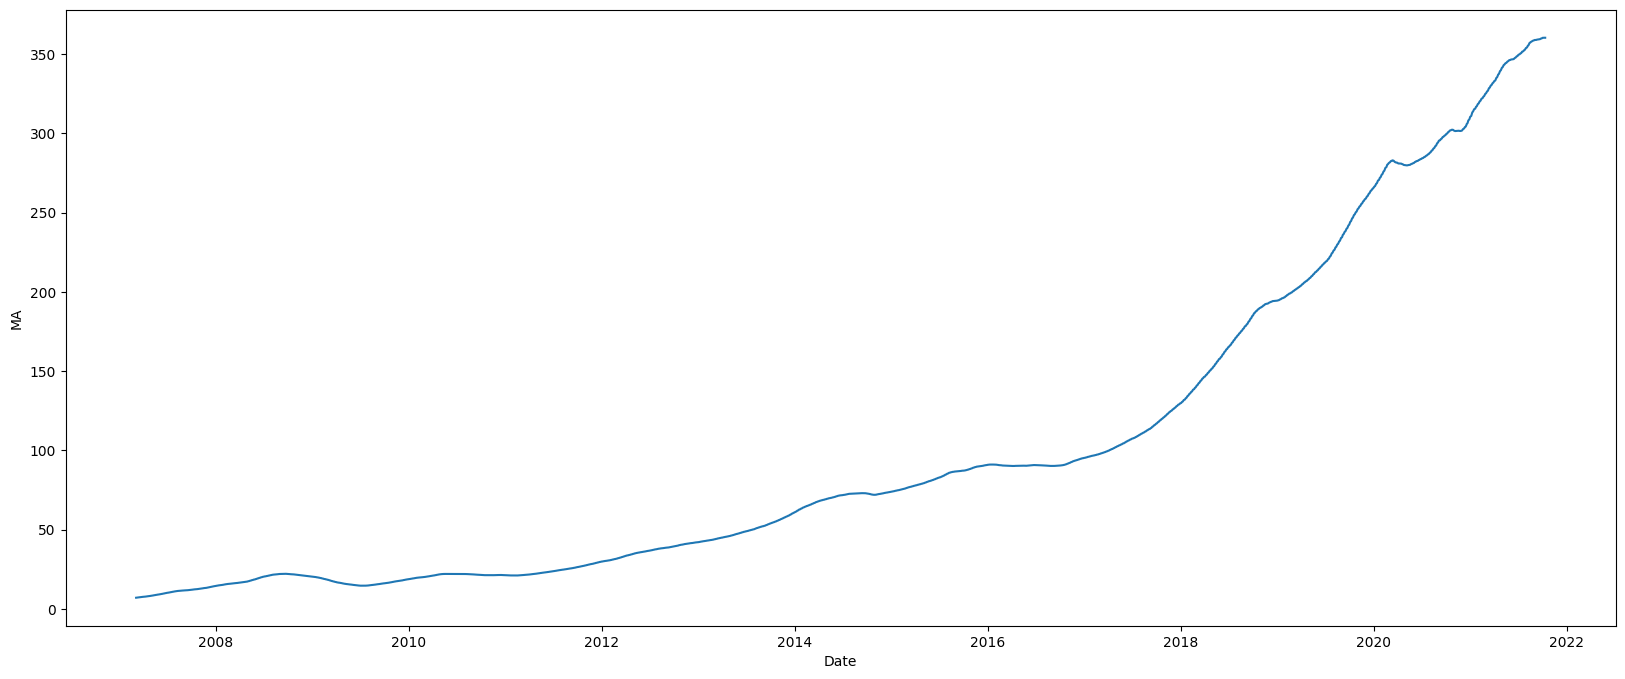

In [42]:
plt.figure(figsize=(20,8))
g = sns.lineplot(x = 'Date', y = 'MA', data = df)
plt.show()

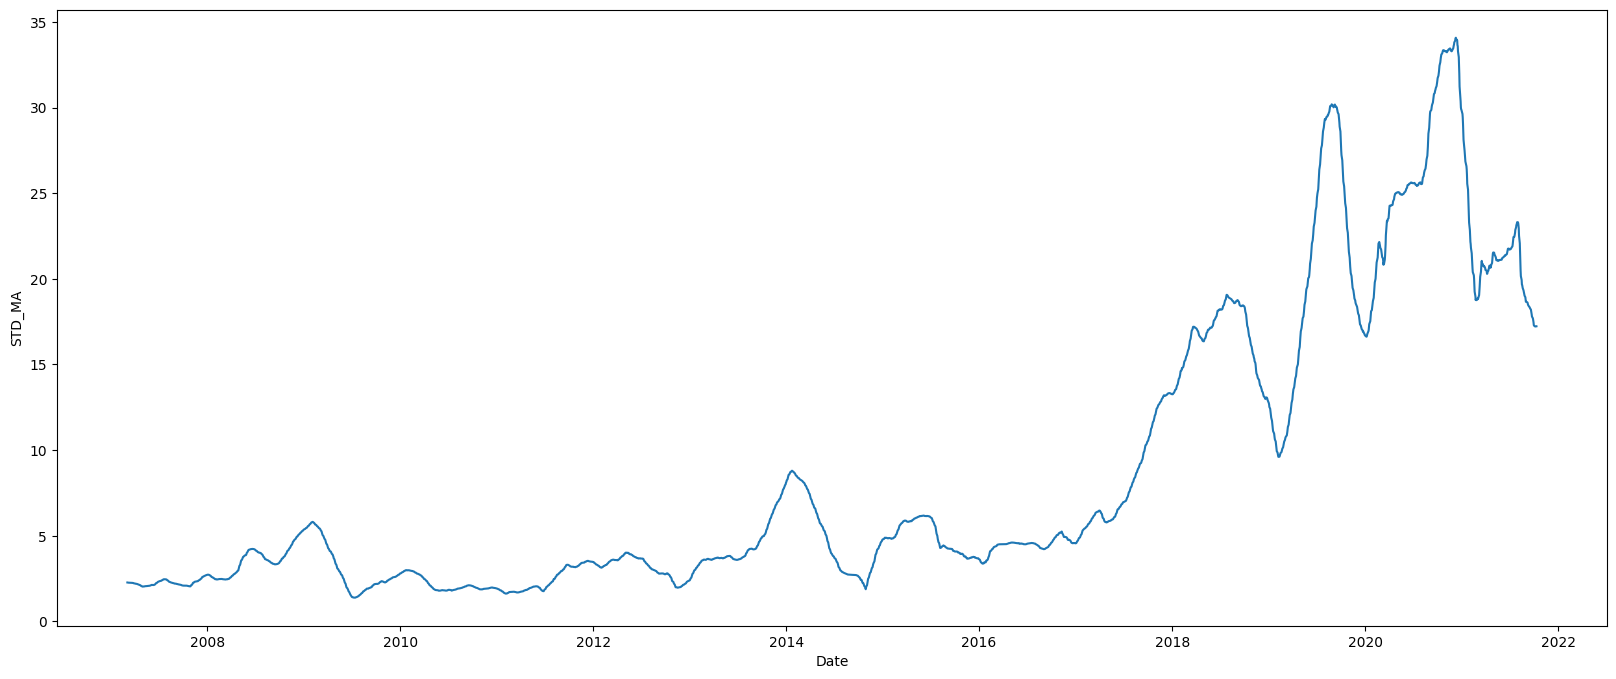

In [43]:
df['STD_MA'] = df['Close'].rolling(round(len(df) * 0.05)).std()
plt.figure(figsize=(20,8))
g = sns.lineplot(x = 'Date', y = 'STD_MA', data = df)

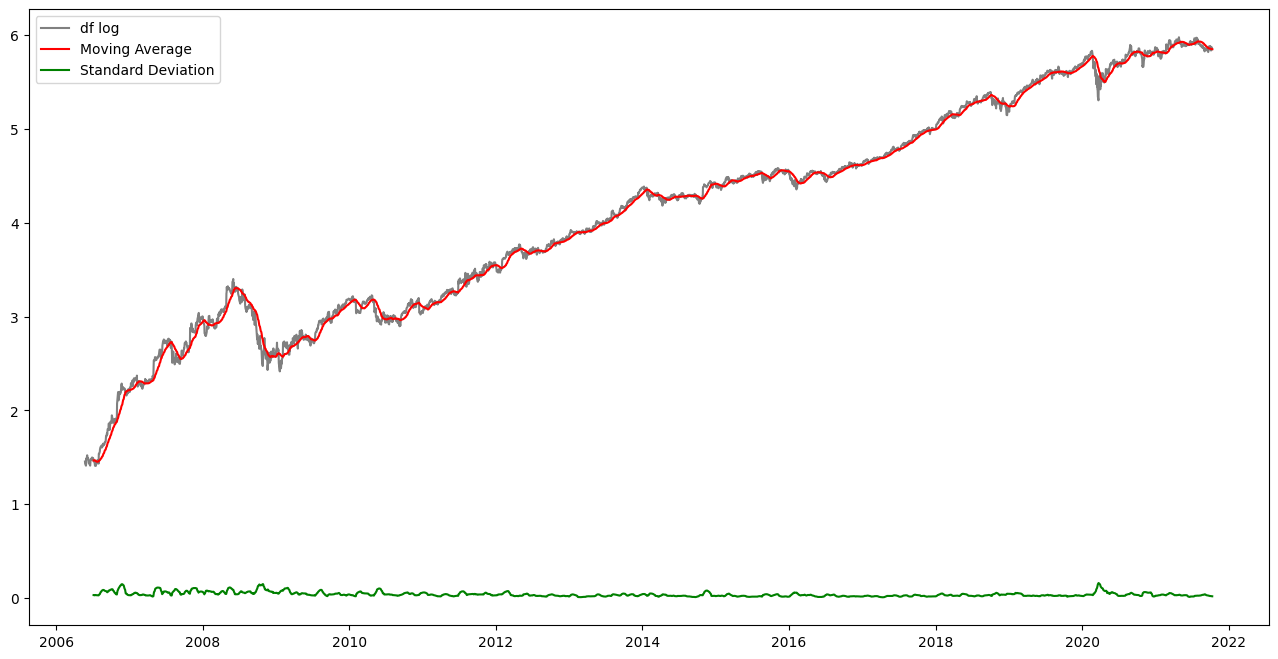

In [44]:
# Do log transformation of time series data
plt.figure(figsize=(16,8))
df_log = np.log(df['Close'])
MAvg = df_log.rolling(window=30).mean()
MStd = df_log.rolling(window=30).std()
plt.plot(df_log, color='grey', label = 'df log')
plt.plot(MAvg, color='r', label = 'Moving Average')
plt.plot(MStd, color='g', label = 'Standard Deviation')
plt.legend()
plt.show()

In [45]:
# Export df_log to csv (don't need to re-run)
# df_log = pd.DataFrame(df_log)
# df_log.to_csv("./data/processed/Mastercard_stock_history_processed.csv")

Time series has a moving average range of 1 to 6 now, with standard deviation close to 0. It is still not stationary, because there is still an upward trend in the time series.

Let's shift the series by order 1 (or by 1 month) & apply differencing (using lagged series) and then check the rolling mean and standard deviation

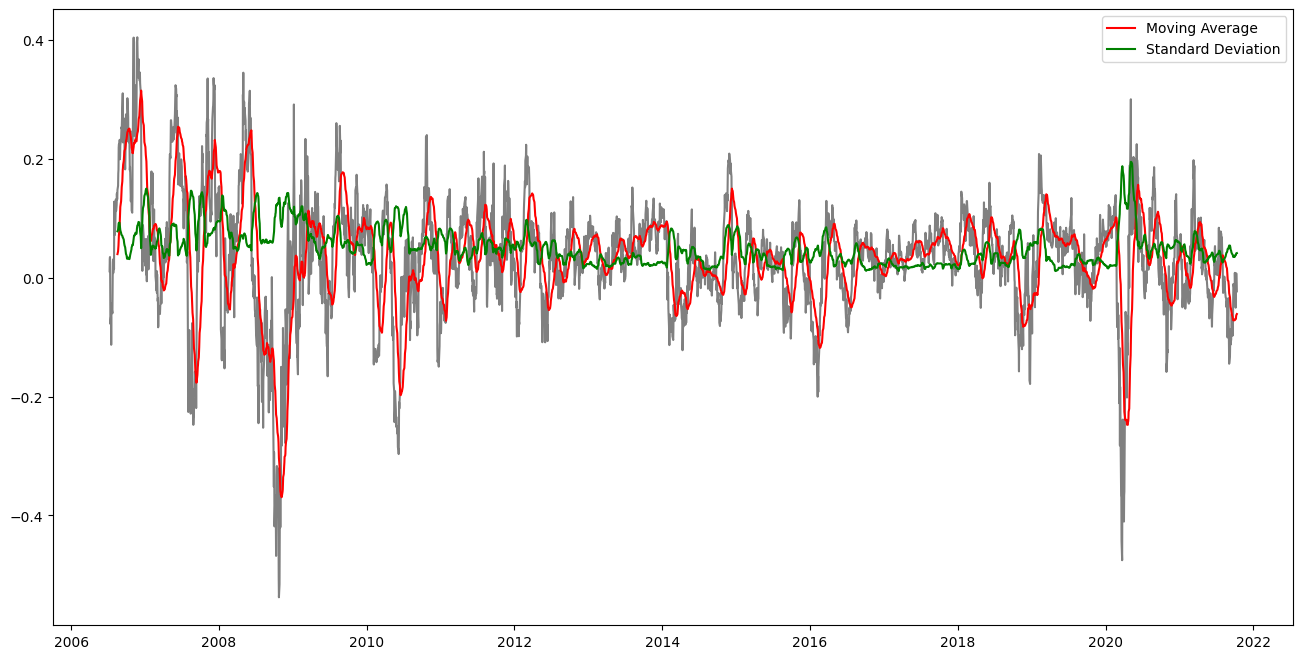

In [46]:
plt.figure(figsize=(16,8))
df_shift = df_log - df_log.shift(periods = 30)
MAvg_shift = df_shift.rolling(window=30).mean()
MStd_shift = df_shift.rolling(window=30).std()
plt.plot(df_shift, color='grey')
plt.plot(MAvg_shift, color='red', label = 'Moving Average')
plt.plot(MStd_shift, color='green', label = 'Standard Deviation')
plt.legend()
plt.show()

# Dropping the null values that we get after applying differencing method
df_shift = df_shift.dropna()

ADFuller test for stationarity of time series, for both log and original time series

**Null Hypothesis:** Time series is non stationary <br>
**Alternative Hypothesis:** Time series is stationary

In [47]:
# Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
def dkfuller(df):
    print("df test")
    adftest = adfuller(df)
    adfout = pd.Series(adftest[0:4], 
                    index=['Test Statistic', 'p-value', 'Lags Used', 'No. of Observations'])
    for k, v in adftest[4].items():
        adfout[f"Crit val: {k}"] = v
    print(adfout)

dkfuller(df['Close'])
dkfuller(np.log(df['Close']))
dkfuller(df_shift)

df test
Test Statistic            1.203926
p-value                   0.996013
Lags Used                28.000000
No. of Observations    3843.000000
Crit val: 1%             -3.432053
Crit val: 5%             -2.862292
Crit val: 10%            -2.567171
dtype: float64
df test
Test Statistic           -2.108513
p-value                   0.241105
Lags Used                18.000000
No. of Observations    3853.000000
Crit val: 1%             -3.432048
Crit val: 5%             -2.862290
Crit val: 10%            -2.567169
dtype: float64
df test
Test Statistic        -6.910012e+00
p-value                1.219202e-09
Lags Used              3.000000e+01
No. of Observations    3.811000e+03
Crit val: 1%          -3.432067e+00
Crit val: 5%          -2.862299e+00
Crit val: 10%         -2.567174e+00
dtype: float64


In [48]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA,STD_MA
Date,,,,,,,,,
2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0,NaN,NaN
2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0,NaN,NaN
2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0,NaN,NaN
2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0,NaN,NaN
2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0,NaN,NaN


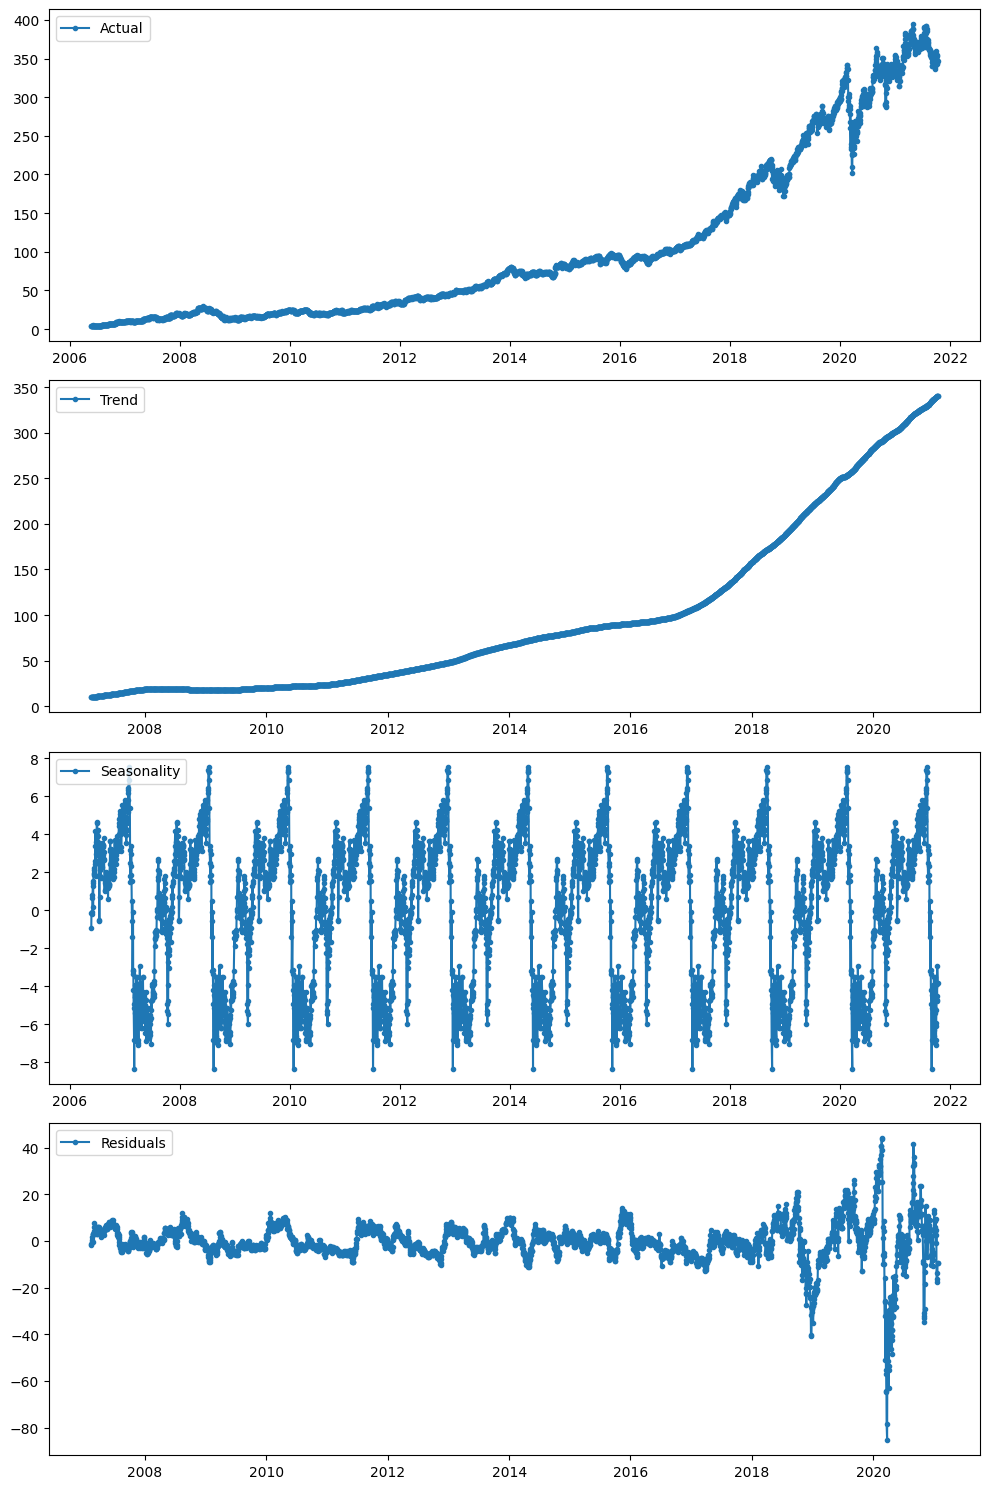

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_cut = pd.DataFrame({'Close': df['Close'], 'Date' : df.index})
df_cut['Date'] = pd.to_datetime(df_cut['Date'])
df_cut.set_index('Date', inplace=True)
decomp = seasonal_decompose(df_cut, period = 365)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid
fig, ax = plt.subplots(nrows = 4, ncols = 1)
fig.set_figwidth(10)
fig.set_figheight(15)

ax[0].plot(df_cut, label='Actual', marker='.')
ax[0].legend(loc='upper left')

ax[1].plot(trend, label='Trend', marker='.')
ax[1].legend(loc='upper left')

ax[2].plot(seasonal, label='Seasonality', marker='.')
ax[2].legend(loc='upper left')

ax[3].plot(residual, label='Residuals', marker='.')
ax[3].legend(loc='upper left')
plt.tight_layout()

We can see that there are significant trend, seasonality and residuals components in the series. Residuals peaked near 2020, which was during covid, followed by a sharp decline to the global minimum.

1. There is an upward trend in stock price over the years
2. There is a seasonal trend every 2 years

## Histogram of prices

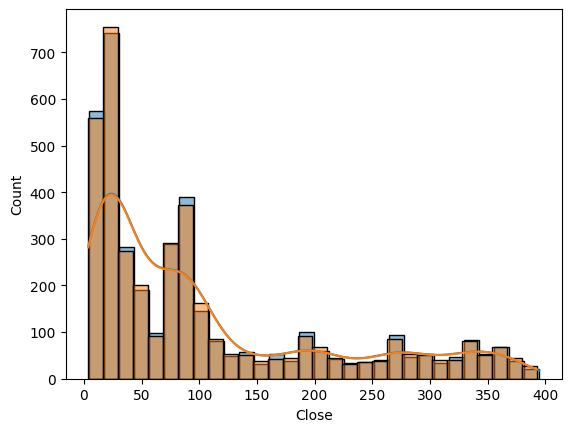

In [50]:
sns.histplot(data=df, x="Close", bins=30, kde=True)
sns.histplot(data=df, x="Open", bins=30, kde=True)
plt.show()

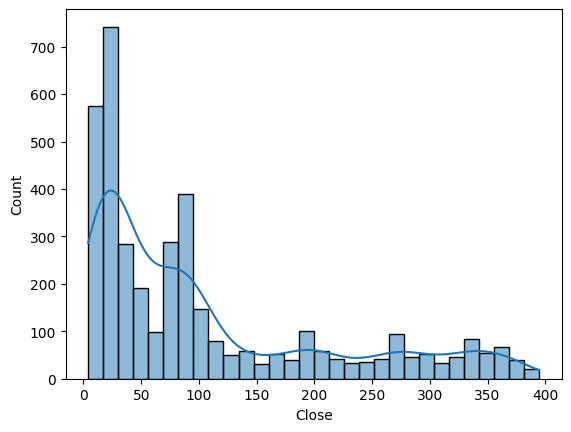

In [51]:
sns.histplot(data=df, x="Close", bins=30, kde=True)
plt.show()

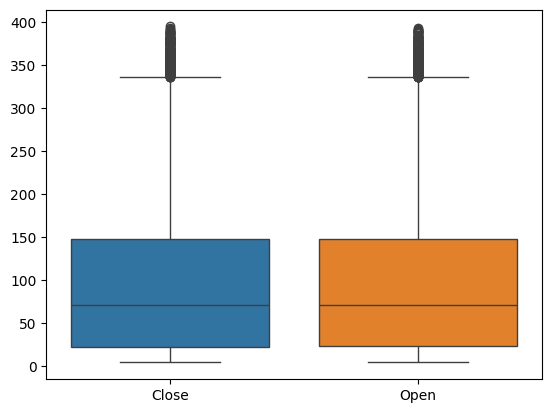

In [52]:
df_temp = pd.DataFrame({'Close': df["Close"].to_list(), 'Open': df["Open"].to_list()})
sns.boxplot(data=df_temp)
plt.show()

We can see that price is right-skewed. This could possibly be due to the fact that for most of the data, the price of the stock is low.

## Lag plot for closing price

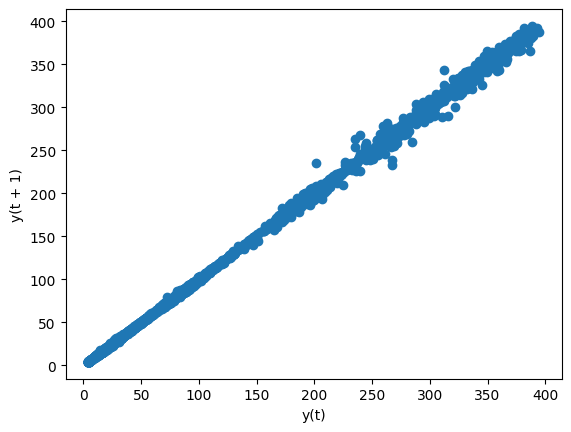

In [53]:
# Lag plot for lag = 1
pd.plotting.lag_plot(df['Close'], lag=1)
plt.show()

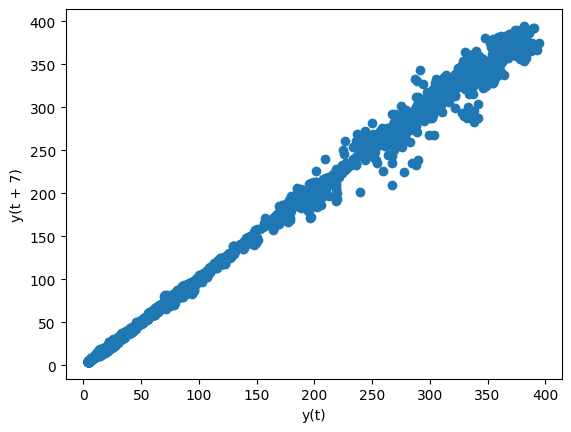

In [54]:
# Lag plot for lag = 7
pd.plotting.lag_plot(df['Close'], lag=7)
plt.show()

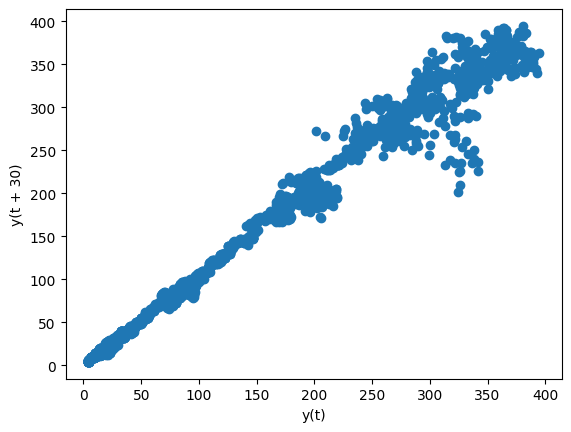

In [55]:
# Lag plot for lag = 30
pd.plotting.lag_plot(df['Close'], lag=30)
plt.show()

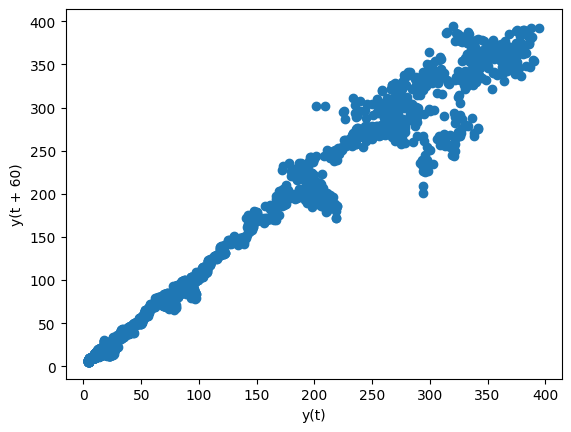

In [56]:
# Lag plot for lag = 60
pd.plotting.lag_plot(df['Close'], lag=60)
plt.show()

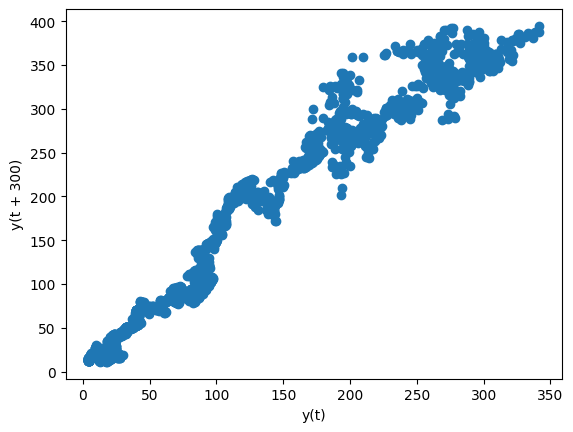

In [57]:
# Lag plot for lag = 300
pd.plotting.lag_plot(df['Close'], lag=300)
plt.show()

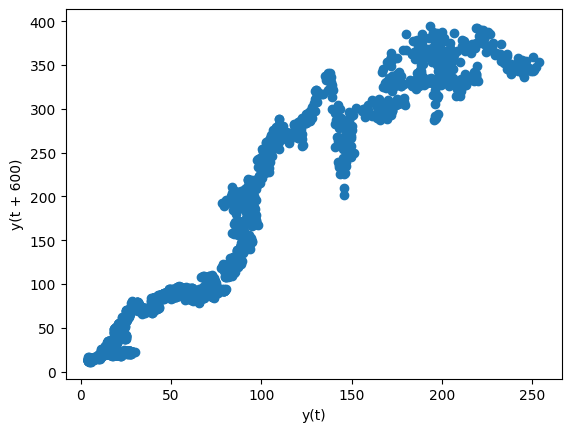

In [58]:
# Lag plot for lag = 600
pd.plotting.lag_plot(df['Close'], lag=600)
plt.show()

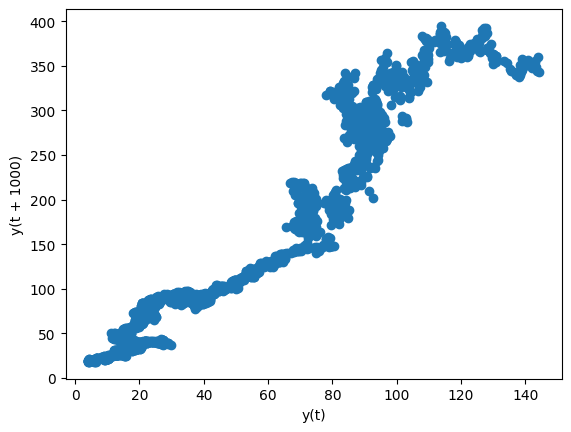

In [59]:
# Lag plot for lag = 1000
pd.plotting.lag_plot(df['Close'], lag=1000)
plt.show()

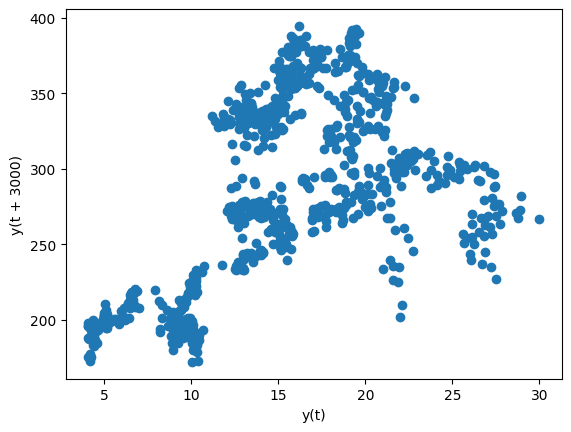

In [60]:
# Lag plot for lag = 3000
pd.plotting.lag_plot(df['Close'], lag=3000)
plt.show()

Based on this, we can also consider doing a linear regression model with lags of 300

## Scatterplot of variables

In [61]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA,STD_MA
Date,,,,,,,,,
2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0,NaN,NaN
2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0,NaN,NaN
2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0,NaN,NaN
2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0,NaN,NaN
2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0,NaN,NaN


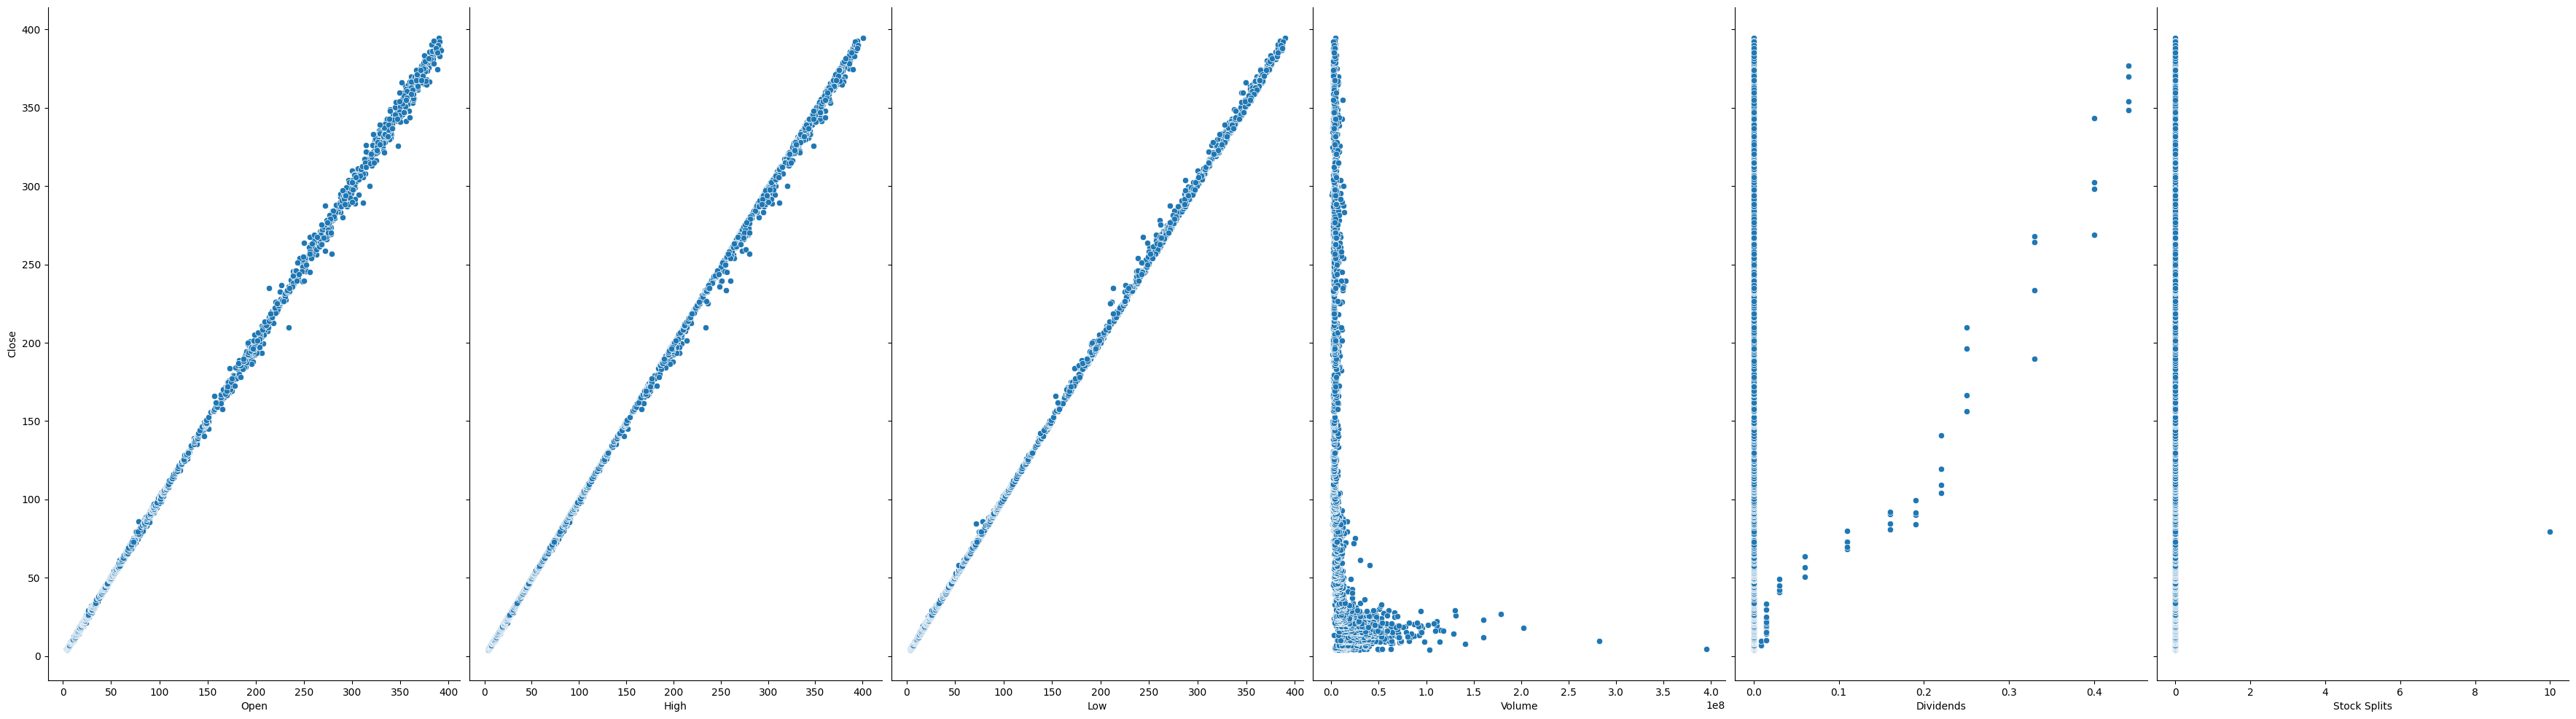

In [62]:

sns.pairplot(
    data = df,
    x_vars = ['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],
    y_vars = ['Close'],
    height= 10,
    aspect=0.6
)
plt.show()

# Comments
We can see a linear relationship between Open, High, Low and Close. <br>
No linear relationship between Volume, Dividends, stock splits and Close. <br>
In cases where companies give out dividends (Dividends > 0), there seems to be a positive correlation between Dividends and the Close. <br>
Idea: Create a new variable has_dividends, = 1 if dividends are given out, 0 otherwise.